In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/learn-co-students/bsc-phase-two-project/main/data/kc_house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [34]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [55]:
dfdf['price'].mean()+df['price'].std()*3

1642400.9938097629

In [15]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [28]:
df['sqft_basement']=df['sqft_basement'].replace(' ','')


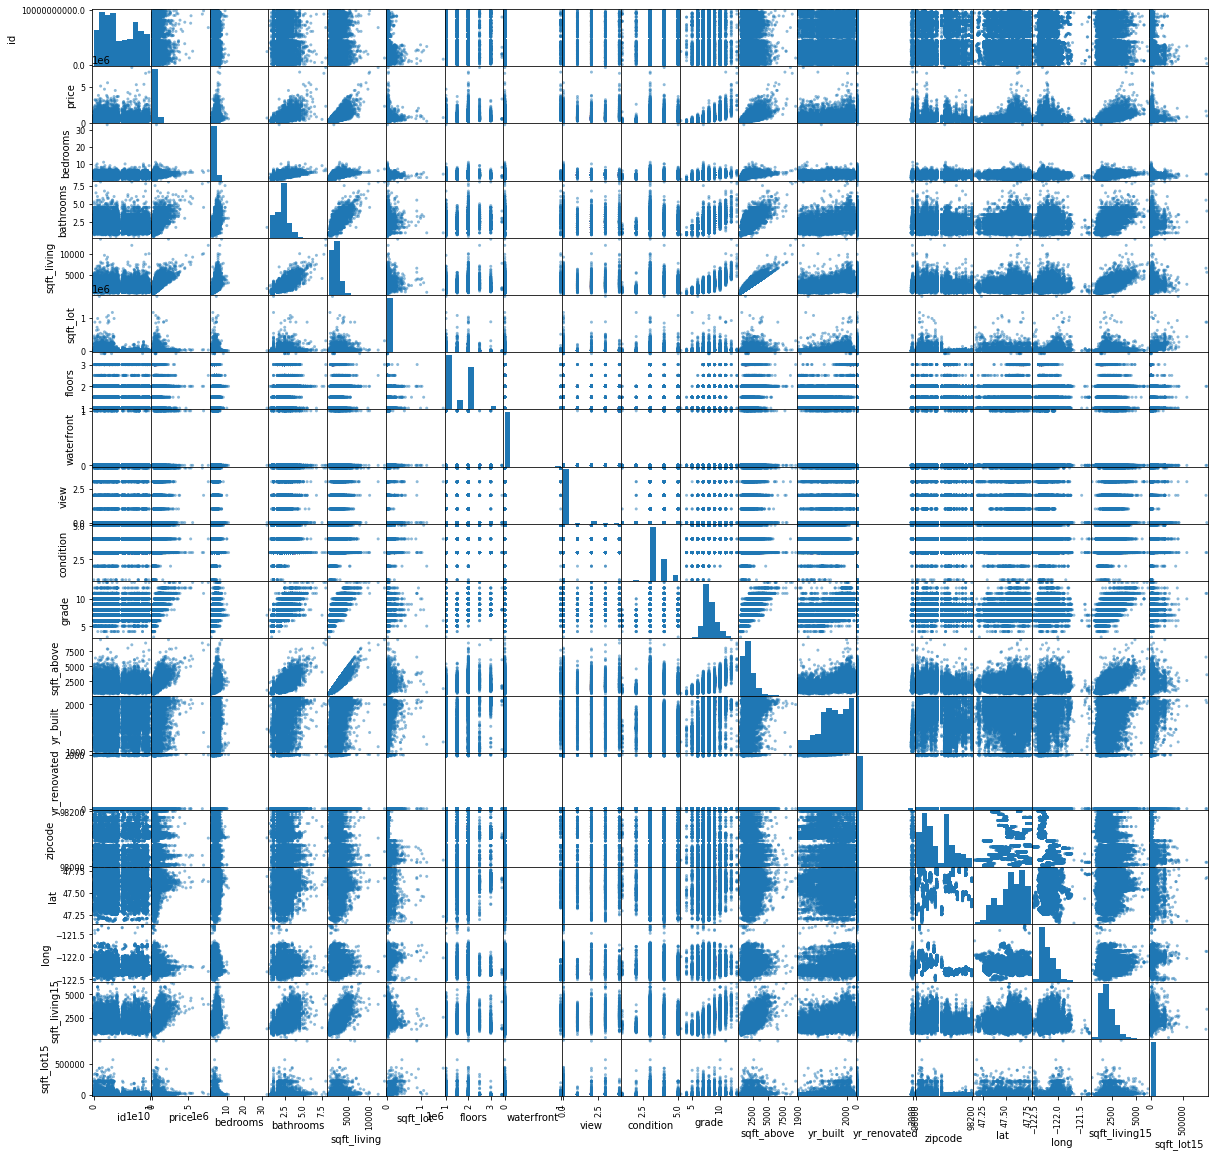

In [36]:
pd.plotting.scatter_matrix(df, figsize=(20,20));
plt.show()

In [37]:
df['basement']=df['sqft_living']-df['sqft_above']

In [39]:
df['basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: basement, Length: 306, dtype: int64

In [40]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
basement         0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [43]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement'],
      dtype='object')

In [48]:
slimdf=df.drop(['sqft_lot','waterfront','condition','sqft_above','sqft_basement','zipcode', 'long','sqft_lot15', 'basement'], axis=1)

In [56]:
slimdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,yr_renovated,lat,sqft_living15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,0.233863,7.657915,1970.999676,83.636778,47.560093,1986.620318
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.765686,1.173200,29.375234,399.946414,0.138552,685.230472
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,3.000000,1900.000000,0.000000,47.155900,399.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,7.000000,1951.000000,0.000000,47.471100,1490.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,7.000000,1975.000000,0.000000,47.571800,1840.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,8.000000,1997.000000,0.000000,47.678000,2360.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,4.000000,13.000000,2015.000000,2015.000000,47.777600,6210.000000


In [67]:
(slimdf['price'].mean()-slimdf['price'].std()*1)

-194439.7066972095

In [68]:
slimdf['sqft_living'].mean()

2080.3218502569803

In [69]:
slimdf['price'].mean()

540296.5735055795

In [82]:
from scipy import stats
slimdf_filt== slimdf[np.abs(stats.zscore(slimdf['price'])) < 3]

,id,date,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,yr_renovated,lat,sqft_living15
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,True,True,True,True,True,True,True,True,True,True,True,True,True
21593,True,True,True,True,True,True,True,True,True,True,True,True,True
21594,True,True,True,True,True,True,True,True,True,True,True,True,True
21595,True,True,True,True,True,True,True,True,True,True,True,True,True


In [79]:
slimdf_filt.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,yr_renovated,lat,sqft_living15
count,2.119100e+04,2.119100e+04,21191.000000,21191.000000,21191.000000,21191.000000,21130.000000,21191.000000,21191.000000,17425.000000,21191.000000,21191.000000
mean,4.592327e+09,5.070103e+05,3.356095,2.087514,2032.486103,1.486858,0.205348,7.605304,1970.926525,79.373142,47.558989,1960.388656
std,2.878225e+09,2.594622e+05,0.917527,0.736021,836.738586,0.538297,0.707558,1.108906,29.285262,390.038728,0.139455,655.151335
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,3.000000,1900.000000,0.000000,47.155900,399.000000
25%,2.125400e+09,3.200000e+05,3.000000,1.500000,1410.000000,1.000000,0.000000,7.000000,1951.000000,0.000000,47.467050,1480.000000
50%,3.905040e+09,4.470000e+05,3.000000,2.250000,1890.000000,1.000000,0.000000,7.000000,1975.000000,0.000000,47.569900,1820.000000
75%,7.334500e+09,6.276500e+05,4.000000,2.500000,2500.000000,2.000000,0.000000,8.000000,1996.000000,0.000000,47.678800,2330.000000
max,9.900000e+09,1.640000e+06,33.000000,7.500000,7480.000000,3.500000,4.000000,12.000000,2015.000000,2015.000000,47.777600,5790.000000


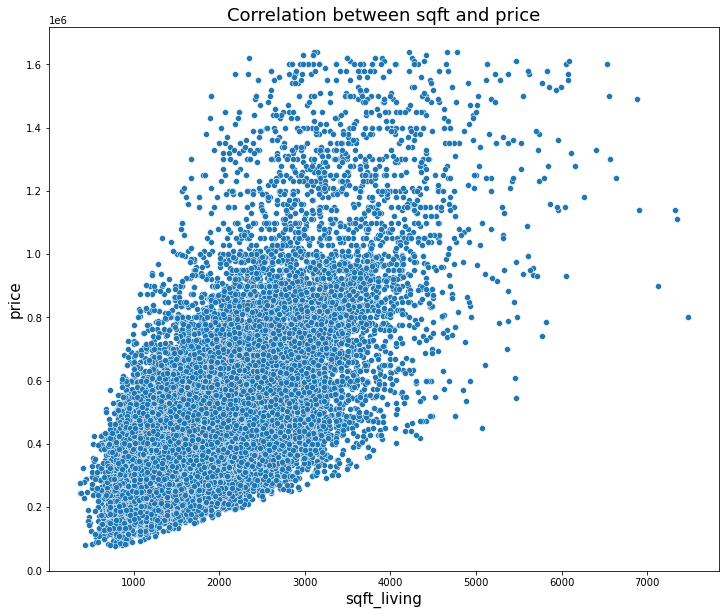

In [80]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=slimdf_filt['sqft_living'], y=slimdf_filt['price'], ax=ax)
ax.set_title('Correlation between sqft and price', fontsize=18)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('sqft_living', fontsize=15);

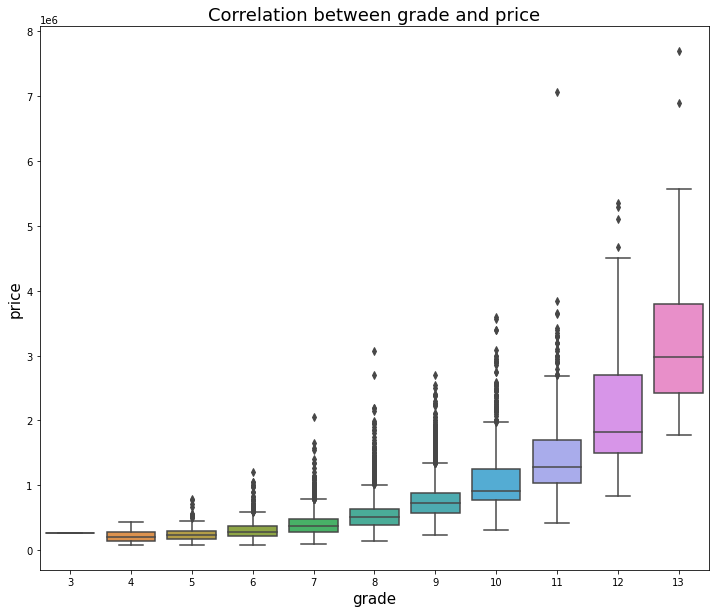

In [88]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x=slimdf['grade'], y=slimdf['price'], ax=ax)
ax.set_title('Correlation between grade and price', fontsize=18)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('grade', fontsize=15);

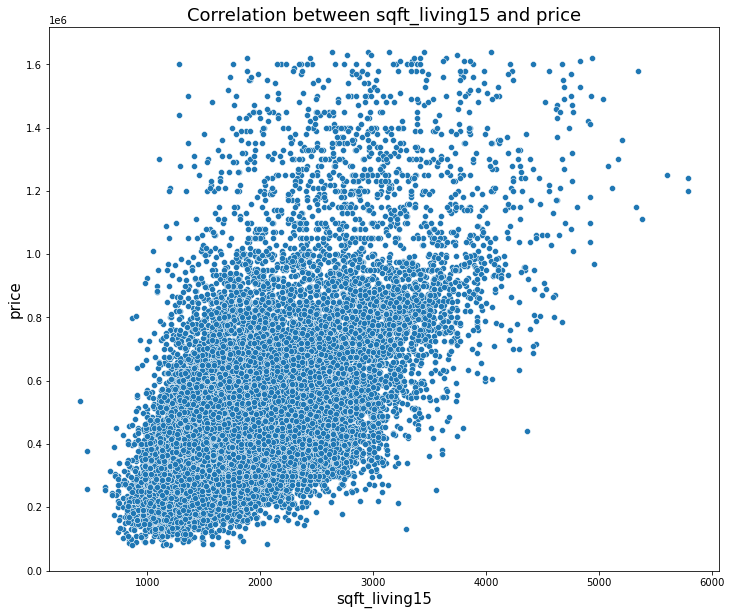

In [86]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=slimdf_filt['sqft_living15'], y=slimdf_filt['price'], ax=ax)
ax.set_title('Correlation between sqft_living15 and price', fontsize=18)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('sqft_living15', fontsize=15);